In [8]:
import sys
sys.path.append('../Proj_308427_348143_XXXXXX')
import matplotlib.pyplot as plt


from Miniproject_2.model import *

import torch
from torch.nn import functional as F

torch.set_grad_enabled(True);

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

valid_input, valid_target = torch.load('../val_data.pkl',map_location=device)#validation set (noise-clean)
train_input, train_target = torch.load('../train_data.pkl',map_location=device) #test set (noise-noise)

print("Vector shape: ",train_input.shape)

Vector shape:  torch.Size([50000, 3, 32, 32])


## Test Model

In [10]:
idx    = 164
len    = 450
train_in  = train_input[idx:idx+len].float()/255.
train_tg = train_target[idx:idx+len].float()/255.

### Train

In [11]:
mod = Model()
mod.train(train_in, train_tg, 5 )

Completed: 1/5 

KeyboardInterrupt: 

### Visual inspection

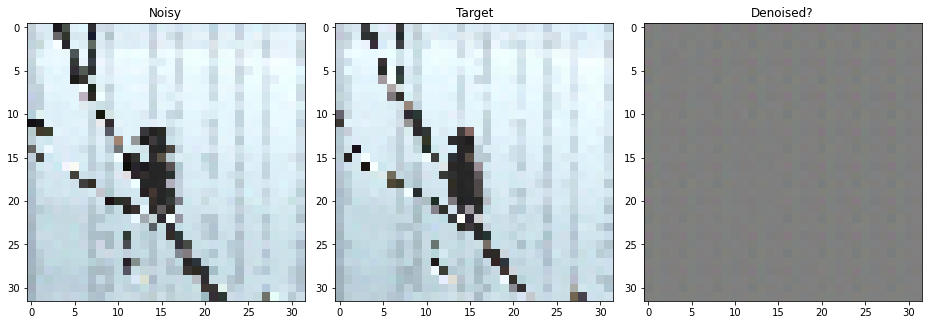

In [5]:
denoised = mod.predict(train_in)[idx]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13,10))

ax[0].imshow(train_in[idx].permute(1,2,0))
ax[1].imshow(train_tg[idx].permute(1,2,0))
ax[2].imshow(denoised.permute(1,2,0))

ax[0].set_title('Noisy')
ax[1].set_title('Target')
ax[2].set_title('Denoised?')
fig.tight_layout()

## Test ```self.parameters```

In [6]:
stride = 2
kernel_size = 2

conv1 = Conv2d(3,5, kernel_size, stride=stride, padding=0, dilation=1)

In [7]:
net.param()


NameError: name 'net' is not defined